In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

In [2]:
# ===================================================
# Generating Sum of n numbers:
# 
# y[i] = y[i-1] + i
# 
# ===================================================

x = []

for i in range(1, 501, 1):
    x.append(i)

y = []

for i in range(1, 501, 1):
    y.append(np.sum(np.linspace(1, i, i)))


# ==============================================
# (batch, timestamp, n_features)
# ==============================================

x = np.array(x, dtype='float').reshape(1, 500, 1)
y = np.array(y, dtype='float').reshape(1, 500)

print('X Shape: ', x.shape)
print('Y Shape: ', y.shape)

print('==================================')

for i in range(10):
    print(x[:, i, :], y[:, i])

print('==================================')

X Shape:  (1, 500, 1)
Y Shape:  (1, 500)
[[1.]] [1.]
[[2.]] [3.]
[[3.]] [6.]
[[4.]] [10.]
[[5.]] [15.]
[[6.]] [21.]
[[7.]] [28.]
[[8.]] [36.]
[[9.]] [45.]
[[10.]] [55.]


In [3]:
class RNNModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        self.L1 = tf.keras.layers.SimpleRNN(1, kernel_initializer='ones', recurrent_initializer='ones', activation='linear')
    
    def call(self, inputs):
        self.x = self.L1(inputs)
        return self.x

In [4]:
model = RNNModel()

In [5]:
model.compile(optimizer='adam', loss='mse')

In [6]:
u = time.time()

hist = model.fit(x, y, epochs=500, shuffle=False, verbose=False)

v = time.time()

print('Total training time: ', (v - u), ' seconds.')

Total training time:  61.83765745162964  seconds.


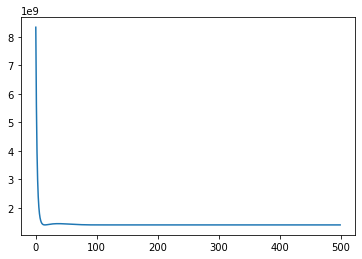

In [7]:
plt.plot(hist.history['loss'])
plt.show()

In [8]:
n = 10
predict_x = [(i+1) for i in range(n)]
predict_y = model.predict(np.array(predict_x).reshape(1, n, 1))

print('sum of: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] is:', np.squeeze(predict_y))

n = 5
predict_x = [(i+1) for i in range(n)]
predict_y = model.predict(np.array(predict_x).reshape(1, n, 1))

print('sum of: [1, 2, 3, 4, 5] is:', np.squeeze(predict_y))

sum of: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] is: 53.03444
sum of: [1, 2, 3, 4, 5] is: 14.67082


In [9]:
for i in model.weights:
    print(i)

<tf.Variable 'rnn_model/simple_rnn/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9930896]], dtype=float32)>
<tf.Variable 'rnn_model/simple_rnn/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9906388]], dtype=float32)>
<tf.Variable 'rnn_model/simple_rnn/bias:0' shape=(1,) dtype=float32, numpy=array([-0.0083332], dtype=float32)>
